In [1]:
from pylab import *


from matplotlib import rc
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'serif': ['Computer Modern'],
        'weight' : 'bold',
        'size'   : 28}

rc('font', **font)
rc('text', usetex=True)

In [2]:
def H_ssh(k,w,v, δ=0.001):
    H = array(
        [[v+w*exp(-1J*k),δ],[δ,v+w*exp(1J*k)]], dtype=complex)
    
    return H

In [3]:
def H_ssh_real(w,v,n=20,δ=0.01,p=False):
    H = δ*array([[1,-1] for i in range(n)])
    H = diag(resize(H,n), k=0)
    A = array([[v,w] for i in range(n)])
    W = diag(resize(A,n-1), k=-1)
    V = diag(resize(A,n-1), k=1)
    if p:
        H[-1,0] = w ; H[0,-1] = w
        
    H = array(H+V+W , dtype=complex)
    return H

In [4]:
H_real = H_ssh_real(1,0.5)
Ek, U = eigh(H_real)
Ek = real(Ek)
Est = argsort(abs(Ek))[0:2]

In [5]:
E_array = []
for v in linspace(-2,2,51):
    H_real = H_ssh_real(1,v)
    Ek, U = eigh(H_real)
    Ek = real(Ek)
    
    indexsort = argsort(Ek)
    E_array.append(Ek[indexsort])
E_array = array(E_array)

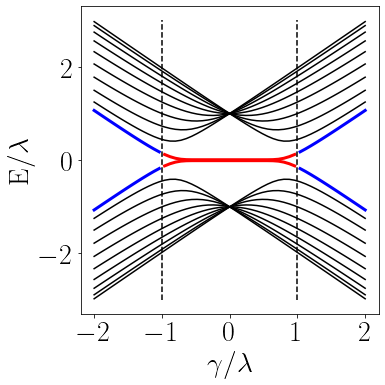

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

for i in range(len(E_array[0])):
    Param = linspace(-2,2,51)
    if i in Est: 
        PM = [j for j in range(len(Param)) if Param[j]>=1]
        Pm = [j for j in range(len(Param)) if Param[j]<=-1]
        Pc = [j for j in range(len(Param)) if abs(Param[j])<=1]
        ax.plot(Param[Pm],E_array.T[i][Pm],lw=3,c='blue')
        ax.plot(Param[PM],E_array.T[i][PM],lw=3, c='blue')
        ax.plot(Param[Pc],E_array.T[i][Pc],lw=3, c='red')
    else:
        ax.plot(Param,E_array.T[i], c='black')

ax.plot([-1,-1],[-3,3],ls='--', c='black')
ax.plot([1,1],[-3,3],ls='--', c='black')
ax.set_xticks([-2,-1,0,1,2])        
ax.set_xlabel('$\gamma/\lambda$')
ax.set_ylabel('E$/\lambda$')
#ax.set_title('a)',loc='left')
plt.tight_layout()
plt.savefig('ssh_images/bands_shh.pdf')
plt.savefig('ssh_images/bands_shh.png')

In [9]:
def density_of_states(v):
    H_real = H_ssh_real(1,v)
    Ek, U = eigh(H_real)
    Ek = real(Ek)
    Est = argsort(abs(Ek))[0:2]
    ψ = [np.real(U.T[i]*U.T.conjugate()[i]) for i in Est]
    return sum(ψ, axis=0)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


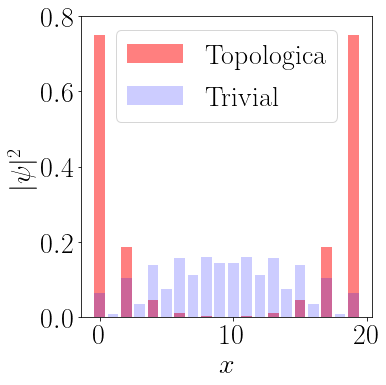

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
ψ0,ψ1 = density_of_states(0.5), density_of_states(1.5)

ax.bar(arange(len(ψ0)),ψ0, alpha=0.5, color='r', label='Topologica')
#ax.scatter(arange(len(ψ0)),ψ0, s=10,c='r')
ax.bar(arange(len(ψ1)),ψ1, alpha=0.2,color='b', label='Trivial')
#ax.scatter(arange(len(ψ1)),ψ1, s=10,c='b')

ax.set_ylim([0,.8])
ax.set_xlabel('$x$')
ax.set_ylabel('$|\psi|^2$')
ax.legend()
plt.tight_layout()
plt.savefig('ssh_images/proyection_ssh.pdf')
plt.savefig('ssh_images/proyection_ssh.png')

In [11]:
def dk(w,v,k):
    return [v + w*cos(k), w*sin(k)]

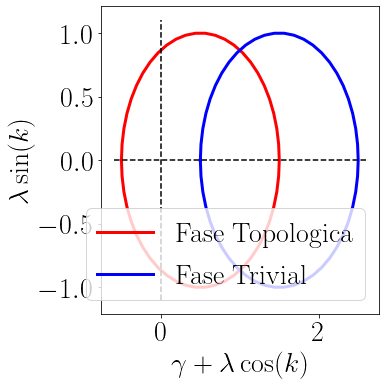

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
K = linspace(-pi,pi,51)
x,y = dk(1,0.5,K)[0], dk(1,0.5,K)[1]
x1,y1 = dk(1,1.5,K)[0], dk(1,1.5,K)[1]
ax.plot(x,y, c='r',lw=3, label='Fase Topologica')
ax.plot(x1,y1, c='b',lw=3, label='Fase Trivial')
ax.plot([0,0],[-1.1,1.1],ls='--', color='black')
ax.plot([-0.6,2.6],[0,0],ls='--', color='black')

ax.set_xlabel('$\gamma + \lambda \cos(k)$')
ax.set_ylabel('$\lambda \sin(k)$')

ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig('ssh_images/loop_shh.pdf')
plt.savefig('ssh_images/loop_shh.png')

## Winding Number

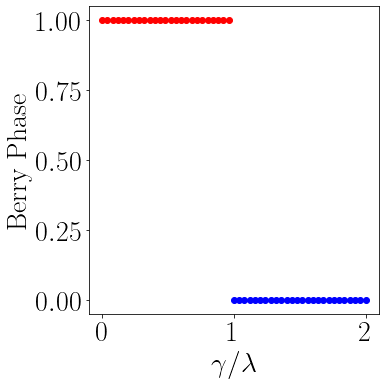

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
for v in linspace(0,2,51):
    WL = ones((2,2), dtype=complex)

    for k in linspace(-pi,pi,100)[1:]:
        H =  matrix(H_ssh(k,1,v),dtype=complex)
        Ek, U = eigh(H)
        Ek = real(Ek)
        WL = WL*U.T.conjugate()*U.T
    
    W = sum(angle(WL))/(2*pi)
    if W > 0.6:
        ax.scatter([v],[W],c='r')
    else:
        ax.scatter([v],[W],c='b')
    

ax.set_xlabel('$\gamma/\lambda$')
ax.set_ylabel('Berry Phase')
plt.tight_layout()
plt.savefig('ssh_images/winding_shh.pdf')
plt.savefig('ssh_images/winding_shh.png')

[False  True  True False  True False False  True  True False  True False]
[ True  True  True  True  True  True False False False False False False]


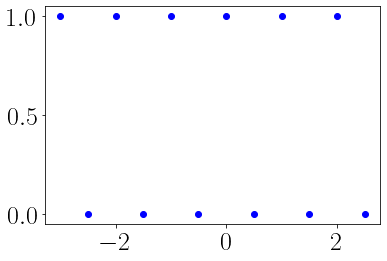

In [12]:
L = 6
POS=matrix(kron(diag(exp(2.0j*pi*arange(L)/(L))),eye(2))) 
#print(POS, shape(POS))
Lwanflow=[]
Hwanflow=[]
Lwane=[]
Hwane=[]
for v in linspace(0,2,2):
    H=matrix(H_ssh_real(1,v,n=L*2,p=True)) #matriz 4x4
    sys=eigh(H)
    #print(sys[0], shape(sys[0]))

    Lval=sys[0][sys[0]<0]
    #print(Lval, shape(Lval))
    Lvec=matrix(sys[1][:,sys[0]<0])
    #print(Lvec, shape(Lvec))
    LP=Lvec*Lvec.H
    #print(LP, shape(LP))
    LW=LP*POS*LP #matrix 4x4
    #print(LW, shape(LW))
    LWval,LWvec=eig(LW)
    print(abs(LWval)>1e-10)
    #########
    LWvec=LWvec[:,abs(LWval)>1e-10]
    LWe=real(diag(LWvec.H*H*LWvec))
    
    #print(L/(2*pi)*sort(angle(LWval[abs(LWval)>1e-10])))
    
    Lwanflow=append(Lwanflow,L/(2*pi)*sort(angle(LWval[abs(LWval)>1e-10])))
    
fig, ax = subplots()
for i in range(L):
    x = real(Lwanflow[i::L])
    ax.plot(x,linspace(0,1,len(x)), 'ko',c='b')
#Lwanflow = Lwanflow.reshape((10,51)) 

$$\hat{P}\hat{X}\hat{P} = e^{i2\pi x_w} =W $$

$$W | w \rangle = e^{i2\pi w} | w \rangle $$

## Pumping SSH

In [15]:
A = 0.5
ξ = 1
def func_cext(θ):
    return  exp(-ξ*(1+A*cos(θ)))

def func_cint(θ):
    return exp(-ξ*(1-A*cos(θ)))


def H_pump_k(k,θ):
    return H_ssh(k,func_cext(θ),func_cint(θ))
def H_pump_real(θ,p=False):
    H = H_ssh_real(func_cext(θ),func_cint(θ),δ=0.1*sin(θ),p=p)
    return H 

## Winding number pump

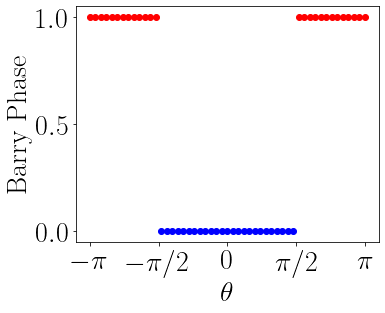

In [17]:
fig, ax = plt.subplots(figsize=(6,5))
WIL= []
for θ in linspace(-pi,pi,51):
    WL = ones((2,2), dtype=complex)

    for k in linspace(-pi,pi,100)[1:]:
        H =  matrix(H_pump_k(k,θ),dtype=complex)
        Ek, U = eigh(H)
        Ek = real(Ek)
        WL = WL*U.T.conjugate()*U.T
    
    W = sum(angle(WL))/(2*pi)
    
    if W > 0.7:
        ax.scatter([θ],[W],c='red')
    else:
        ax.scatter([θ],[W],c='b')

    WIL.append(W)
Wm = [i for i in range(len(WIL)) if WIL[i]>0.7]
Wc = [i for i in range(len(WIL)) if WIL[i]<=0.7]

#ax.plot([linspace(-pi,pi,51)[min(Wc)],linspace(-pi,pi,51)[min(Wc)]],[0,1])
#ax.plot([pi/2,pi/2],[0,1])

ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
ax.set_xlabel('$\\theta$')
ax.set_ylabel('Barry Phase')
plt.tight_layout()
plt.savefig('ssh_images/winding_shh_pump.pdf')
plt.savefig('ssh_images/winding_shh_pump.png')

In [18]:
E_array = []
for θ in linspace(-pi,pi,51):
    H = H_pump_real(θ)
    
    Ek, U = eigh(H)
    Ek = real(Ek)
    
    indexsort = argsort(Ek)
    E_array.append(Ek[indexsort])
E_array = array(E_array)

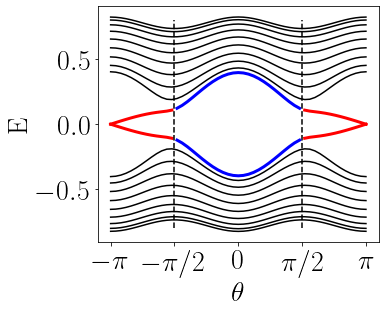

In [19]:
fig, ax = plt.subplots(figsize=(6,5))

Param = linspace(-pi,pi,51)
for i in range(len(E_array[0])):
    if i in Est:  
        PM = [j for j in range(len(Param)) if Param[j]>=pi/2]
        Pm = [j for j in range(len(Param)) if Param[j]<=-pi/2]
        Pc = [j for j in range(len(Param)) if abs(Param[j])<=pi/2]
        ax.plot(Param[Pm],E_array.T[i][Pm],lw=3, c='red')
        ax.plot(Param[PM],E_array.T[i][PM],lw=3, c='red')
        ax.plot(Param[Pc],E_array.T[i][Pc],lw=3, c='blue')
    else:
        ax.plot(Param,E_array.T[i], c='black')
        
        
ax.plot([-pi/2,-pi/2],[-.8,.8],ls='--', c='black')
ax.plot([pi/2,pi/2],[-.8,.8],ls='--', c='black')   
ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
ax.set_xlabel('$\\theta$')
ax.set_ylabel('E')
plt.tight_layout()
plt.savefig('ssh_images/bands_shh_pump.pdf')
plt.savefig('ssh_images/bands_shh_pump.png')

## Centros de Wannier

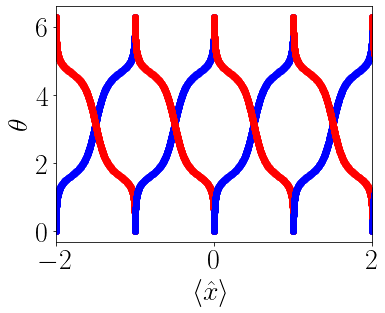

In [20]:
L = 10
POS=matrix(kron(diag(exp(2.0j*pi*arange(L)/(L))),eye(2))) 
Lwanflow=[]
Hwanflow=[]
Lwane=[]
Hwane=[]
for θ in linspace(0,2*pi,501):
    H=matrix(H_pump_real(θ,p=True))
    sys=eigh(H)

    Lval=sys[0][sys[0]<0]
    Lvec=matrix(sys[1][:,sys[0]<0])
    LP=Lvec*Lvec.H
    LW=LP*POS*LP
    LWval,LWvec=eig(LW)
    LWvec=LWvec[:,abs(LWval)>1e-10]
    LWe=real(diag(LWvec.H*H*LWvec))
    
    Lwanflow=append(Lwanflow,L/(2*pi)*sort(angle(LWval[abs(LWval)>1e-10])))
    
    
    Hval=sys[0][sys[0]>0]
    Hvec=matrix(sys[1][:,sys[0]>0])
    HP=Hvec*Hvec.H
    HW=HP*POS*HP
    HWval,HWvec=eig(HW)
    
    Hwanflow=append(Hwanflow,L/(2*pi)*sort(angle(HWval[abs(HWval)>1e-10])))
    
fig, ax = plt.subplots(figsize=(6,5))
for i in range(L):
    x = real(Lwanflow[i::L])
    x1= real(Hwanflow[i::L])
    ax.plot(x,linspace(0,2*pi,len(x)),'ko',c='b')
    ax.plot(x1,linspace(0,2*pi,len(x1)),'ko',c='r')
#Lwanflow = Lwanflow.reshape((10,51)) 


ax.set_xlim(-2,2)
ax.set_xlabel('$\langle \hat{x} \\rangle$')
ax.set_ylabel('$\\theta$')

plt.tight_layout()
plt.savefig('ssh_images/wannier_center_shh_pump.pdf')
plt.savefig('ssh_images/wannier_center_shh_pump.png')

In [21]:
def dk_pump(θ,k):
    return [func_cint(θ) + func_cext(θ)*cos(k), func_cext(θ)*sin(k)]

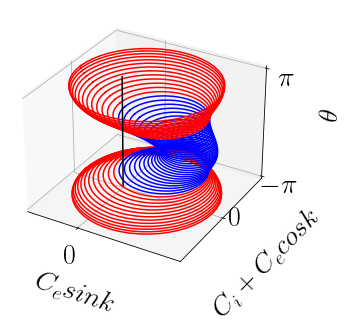

In [22]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection='3d')
ax.xaxis.labelpad=20
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20

for θ in linspace(-pi,pi,51):
    x,y = dk_pump(θ,K)[0], dk_pump(θ,K)[1]
    
    if abs(θ) <= pi/2:
        ax.plot(x,y,[θ],c='b')
    else:
        ax.plot(x,y,[θ],c='r')

ax.plot([0,0],[0,0],[-pi,pi],c='black')  
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_zticks([-pi,pi])
ax.set_zticklabels(['$-\pi$','$\pi$'])

ax.yaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

ax.set_xlabel('$C_{e}sink$')
ax.set_ylabel('$C_{i} + C_{e}cosk$')

ax.set_zlabel('$\\theta$')
plt.savefig('ssh_images/loop_pump_ssh.pdf')
plt.savefig('ssh_images/loop_pump_ssh.png')

In [262]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()
for θ in linspace(-pi,pi,51):
    X,Y = dk_pump(θ,K)[0], dk_pump(θ,K)[1]
    #ax.plot(x,y+sin(θ),[cos(θ)],c='b')
    if abs(θ) <= pi/2:
        fig.add_trace(go.Scatter3d(x=X,y=Y+sin(θ),z=ones(len(X))*cos(θ),mode='lines', line=dict(
            color='blue',
            width=10)))
    else:
        fig.add_trace(go.Scatter3d(x=X,y=Y+sin(θ),z=ones(len(X))*cos(θ),mode='lines', line=dict(
            color='red',
            width=10)))
    
fig.update_layout(showlegend=False, height=600, width=600, title_text="",
                  
                font=dict(
                family="Computer Modern",
                size=22,
                color="black"))

fig.update_xaxes(title_text="X", tickvals = [-1,0,1])
fig.update_yaxes(title_text="Y", tickvals = [-1,0,1])    
fig.update_yaxes(title_text="θ", tickvals = [-1,0,1])   
fig.show()
#fig.write_image("images/bands_surface1.png")   
